In [328]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [329]:
# load dataset
df = pd.read_csv('climate_nasa.csv')
df

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes


In [330]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None


In [331]:
# Descriptive statistics
print(df.describe())

       likesCount  commentsCount
count  522.000000     244.000000
mean     4.720307       8.696721
std     12.053556      12.266176
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       5.000000
75%      4.000000      10.000000
max    126.000000      93.000000


In [332]:
# Check for missing values
print(df.isnull().sum())

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64


In [333]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [334]:
# Extract year for temporal analysis
df['year'] = df['date'].dt.year

In [335]:
# Define keywords for climate indicators
climate_keywords = {
    'temperature': ['temperature','temperature_anomaly' 'temp', 'warming', 'hotter', 'colder'],
    'co2': ['co2', 'carbon dioxide', 'greenhouse gas', 'ghg'],
    'sea_level': ['sea level', 'ocean rise', 'coastal flooding'],
    'precipitation': ['rain', 'precipitation', 'snow', 'drought', 'flood'],
    'solar_radiation': ['solar radiation', 'sunlight', 'uv'],
    'extreme_weather': ['hurricane', 'storm', 'tornado', 'extreme weather']
}

In [336]:
# Function to count keyword mentions
def count_keywords(text, keywords):
    if pd.isna(text):
        return 0
    text = text.lower()
    return sum(1 for keyword in keywords if keyword in text)

# Add columns for each climate indicator
for indicator, keywords in climate_keywords.items():
    df[indicator] = df['text'].apply(lambda x: count_keywords(x, keywords))
    from wordcloud import WordCloud
from textblob import TextBlob
import re

    # Sentiment analysis
def get_sentiment(text):
    if pd.isna(text):
        return 0
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['text'].apply(get_sentiment)

In [337]:
df

,date,likesCount,profileName,commentsCount,text,year,temperature,co2,sea_level,precipitation,solar_radiation,extreme_weather,sentiment
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,2022,0,1,0,0,0,0,0.000000
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...,2022,0,0,0,0,0,0,0.600000
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,2022,0,2,0,0,0,0,0.000000
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...,2022,0,0,0,0,0,0,0.053571
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",2022,0,1,0,0,0,0,-0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2022-12-22 17:21:37+00:00,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞,2022,0,0,0,0,0,0,0.000000
518,2022-12-22 17:19:51+00:00,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...,2022,1,0,0,0,0,0,0.000000
519,2022-12-22 17:12:57+00:00,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...,2022,1,0,0,0,0,0,0.000000
520,2022-12-22 17:01:12+00:00,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes,2022,0,0,0,0,0,0,0.000000


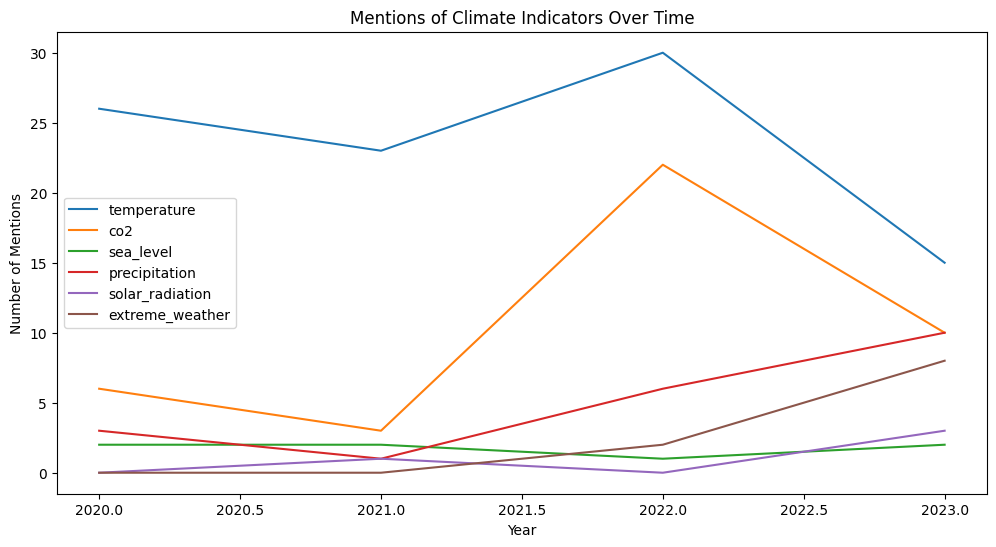

In [338]:
# Plotting
plt.figure(figsize=(12, 6))
for indicator in climate_keywords.keys():
    yearly_mentions = df.groupby('year')[indicator].sum()
    plt.plot(yearly_mentions.index, yearly_mentions.values, label=indicator)
plt.title('Mentions of Climate Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend()
plt.show()

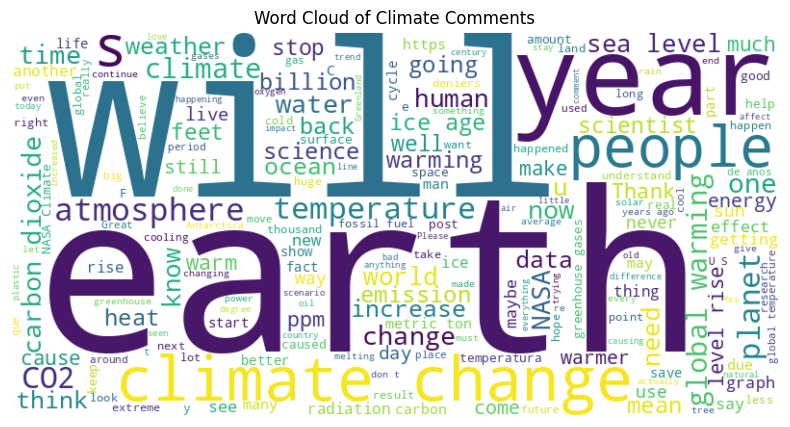

In [339]:
# Word cloud
text = ' '.join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Climate Comments')
plt.show()

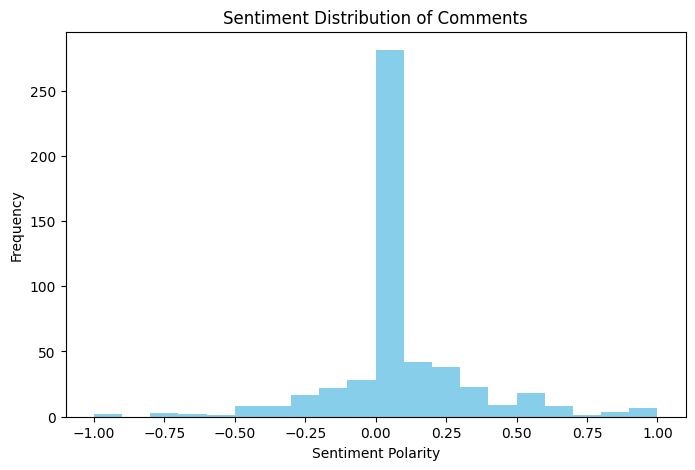

In [340]:
# Sentiment distribution
plt.figure(figsize=(8, 5))
plt.hist(df['sentiment'], bins=20, color='skyblue')
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

##Data Exploration and Visualization

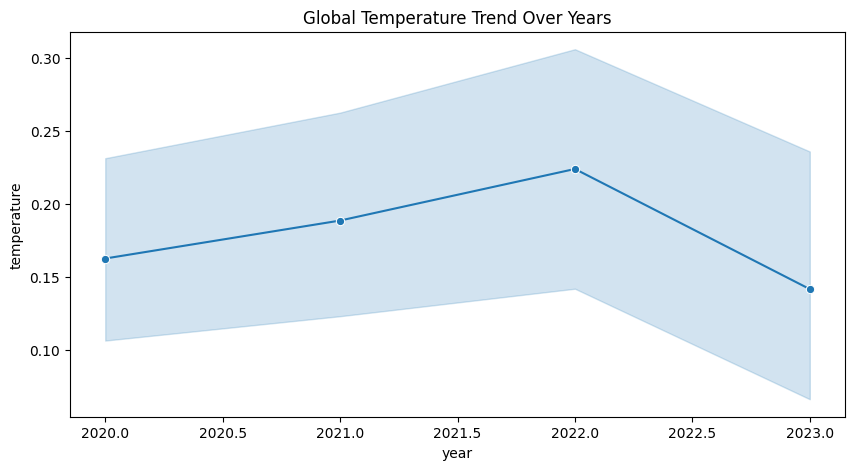

In [341]:
# Line plot for temperature over time (if year column exists)

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='temperature', marker='o')
plt.title("Global Temperature Trend Over Years")
plt.show()

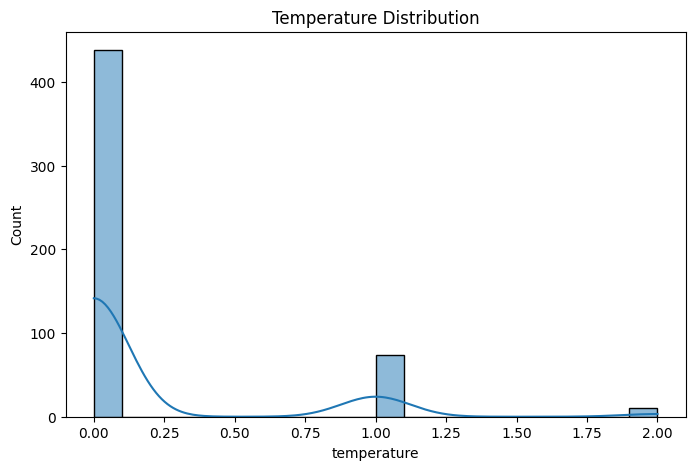

In [342]:
# Histogram for temperature
plt.figure(figsize=(8,5))
sns.histplot(df['temperature'], bins=20, kde=True)
plt.title("Temperature Distribution")
plt.show()

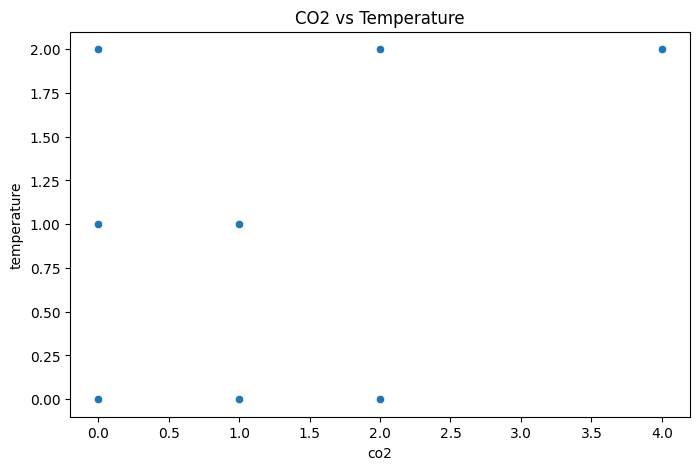

In [343]:
# Scatter plot between CO2 and Temperature
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='co2', y='temperature')
plt.title("CO2 vs Temperature")
plt.show()

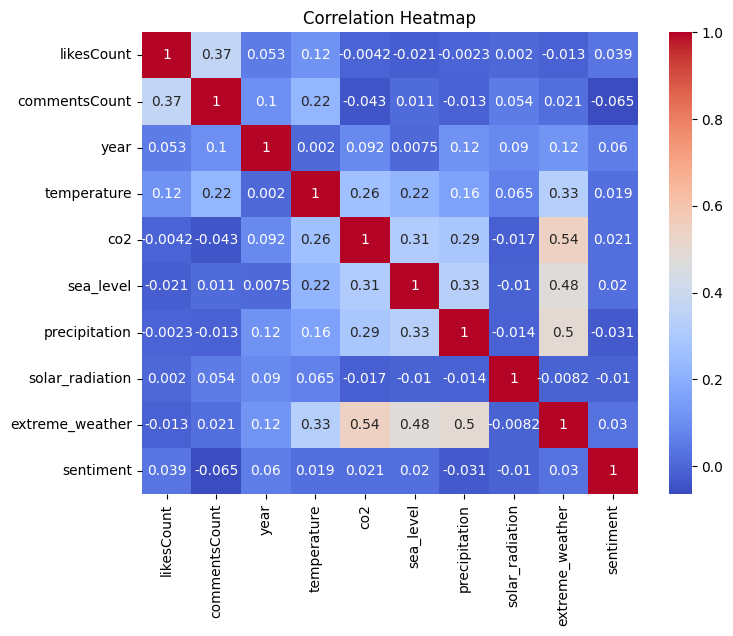

In [344]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

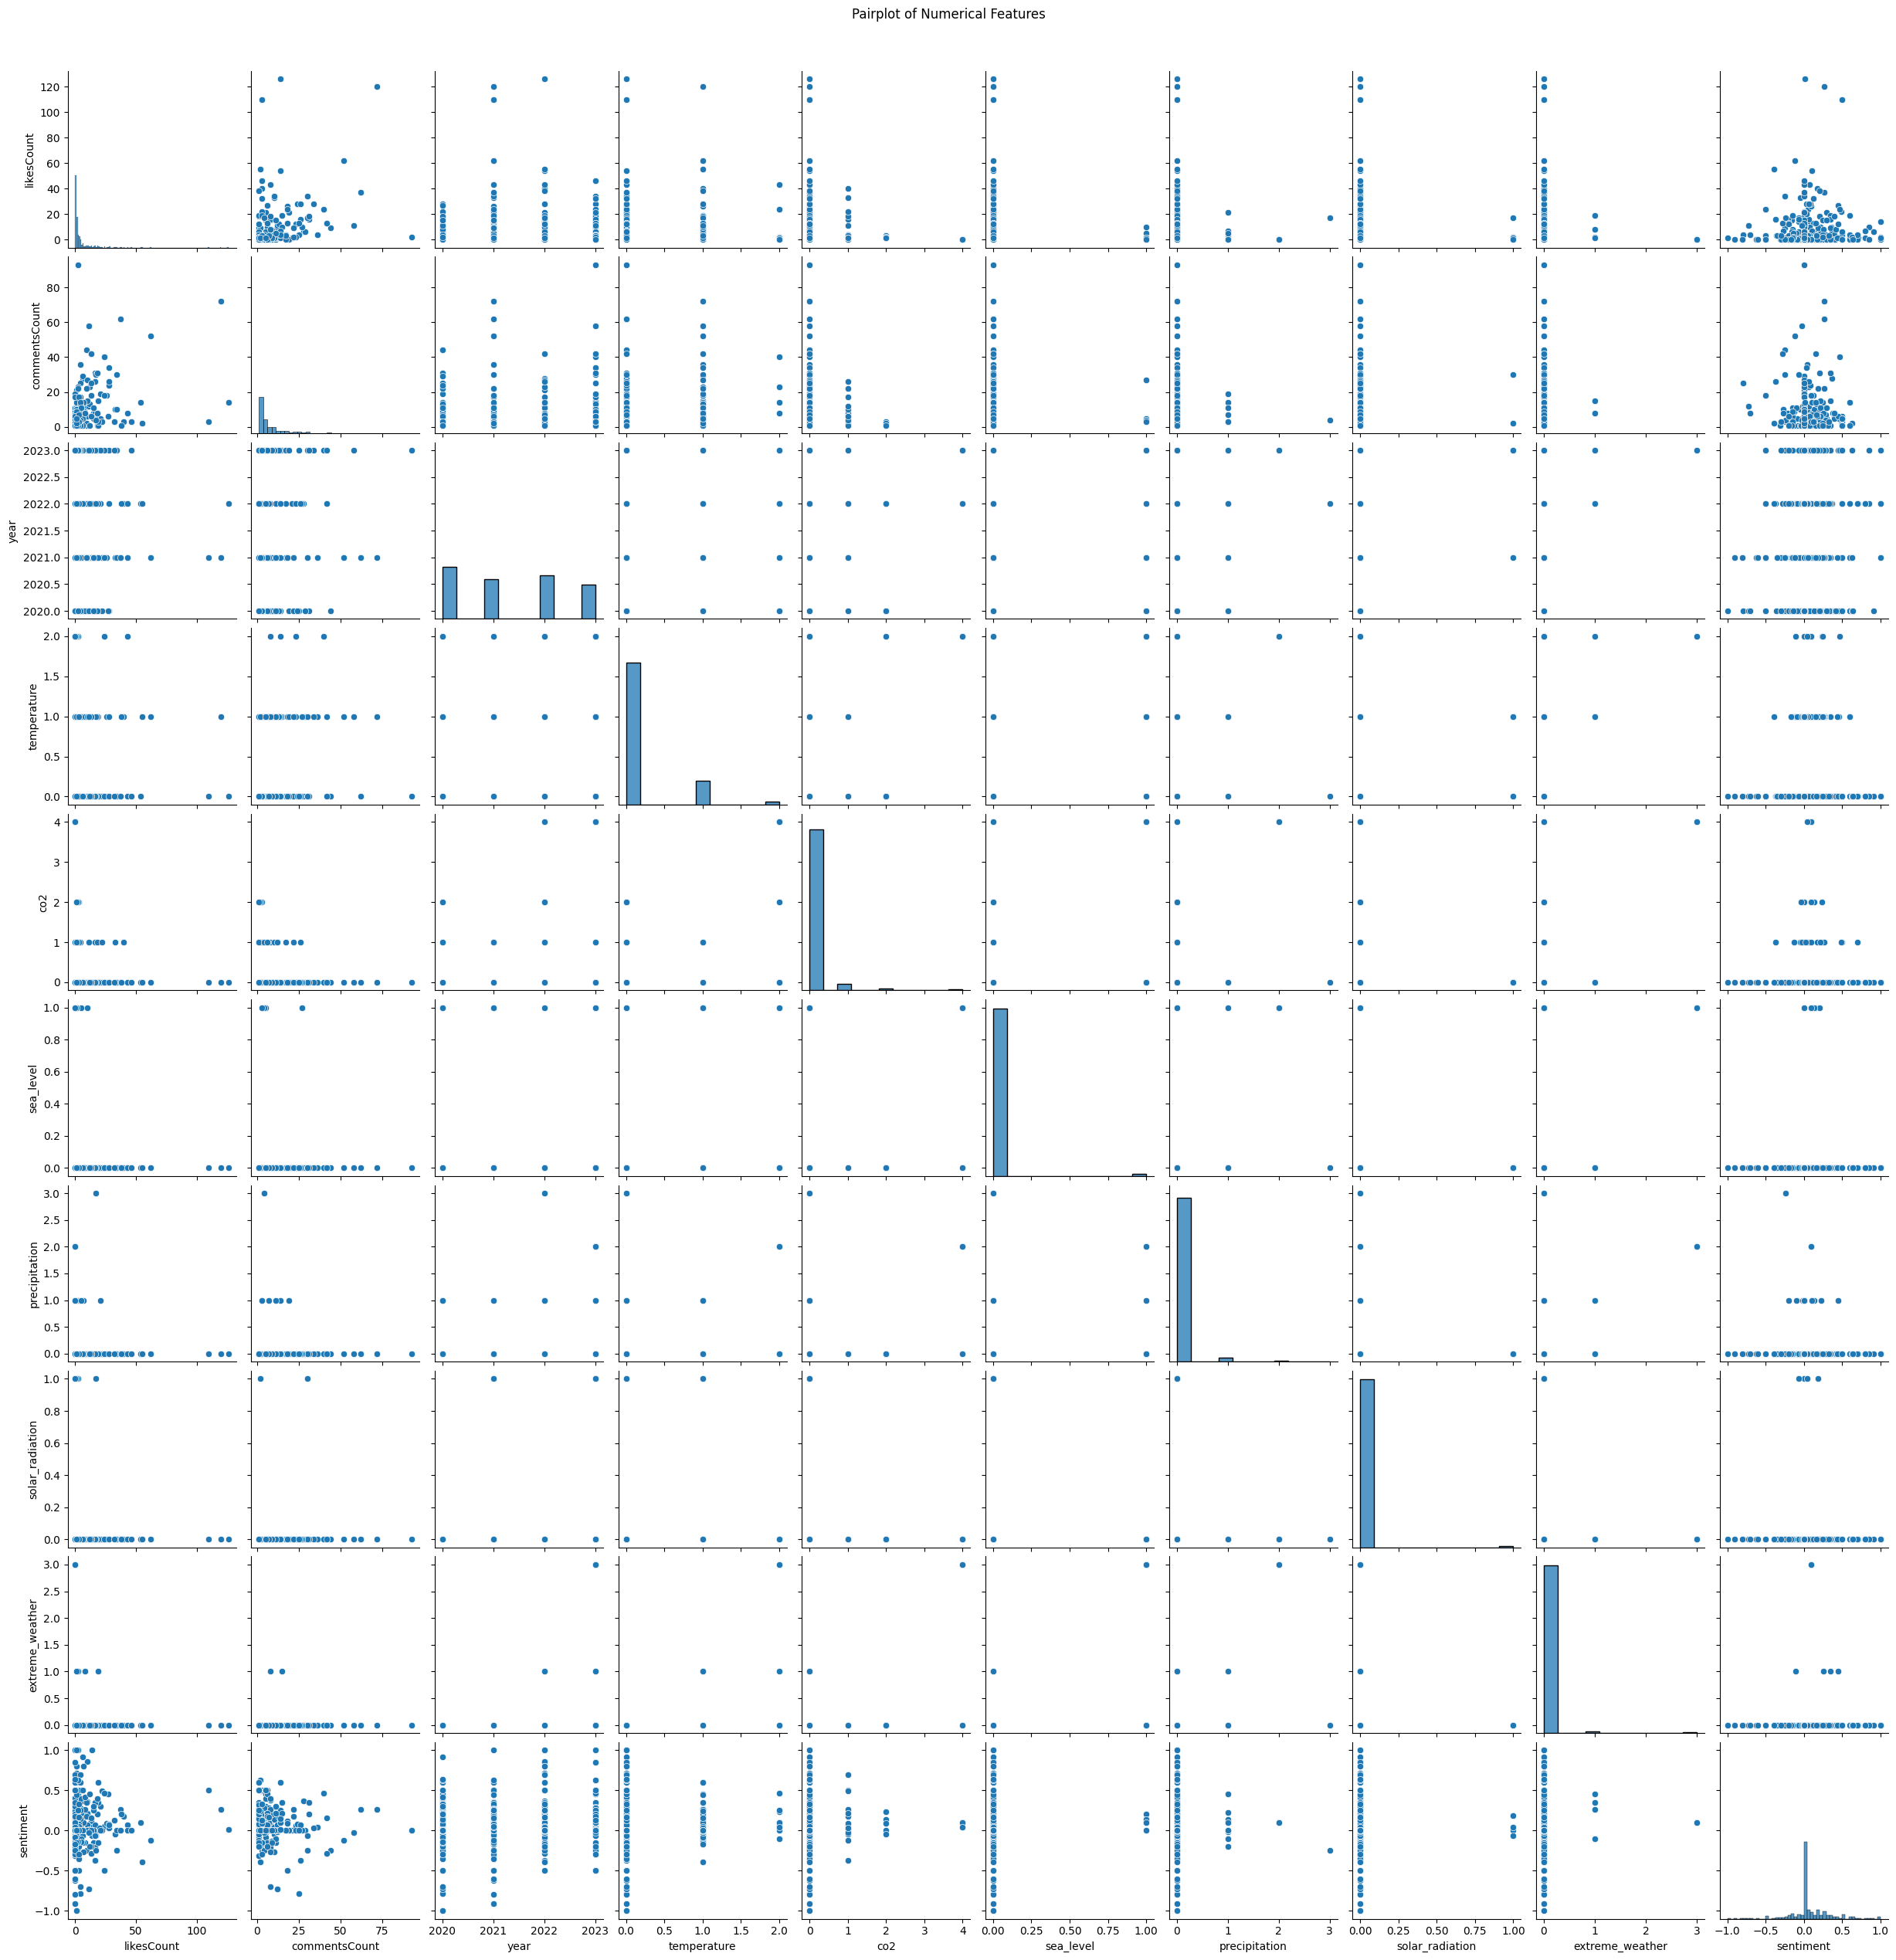

In [345]:
#PAIRPLOT (Relationships between features)
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


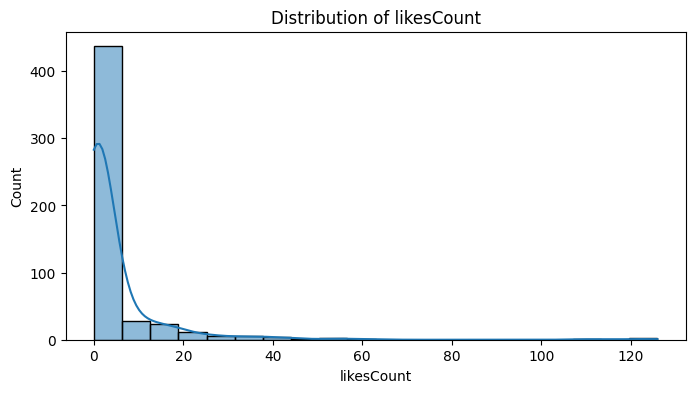

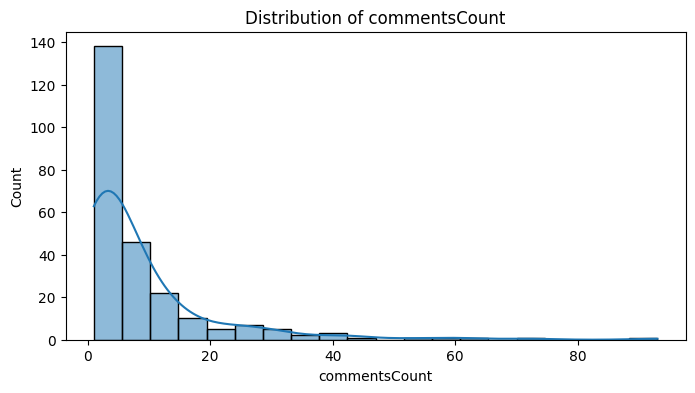

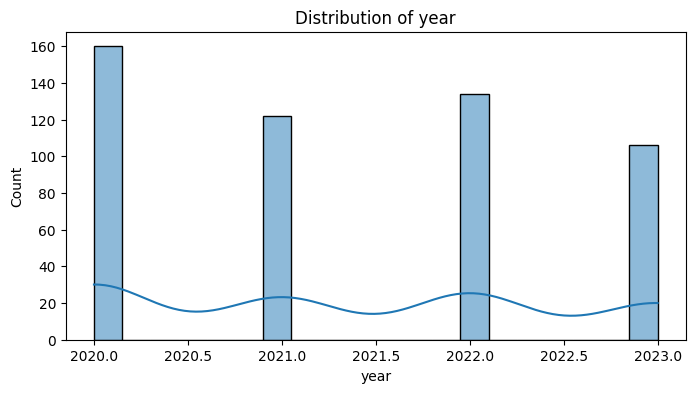

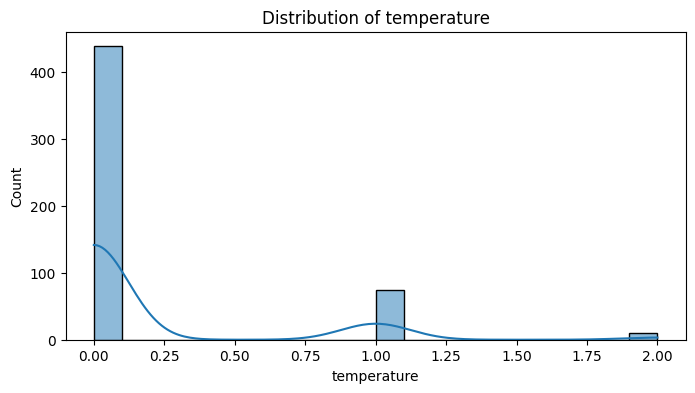

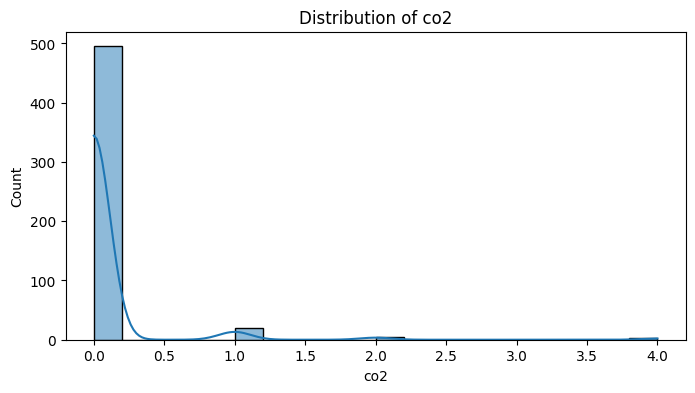

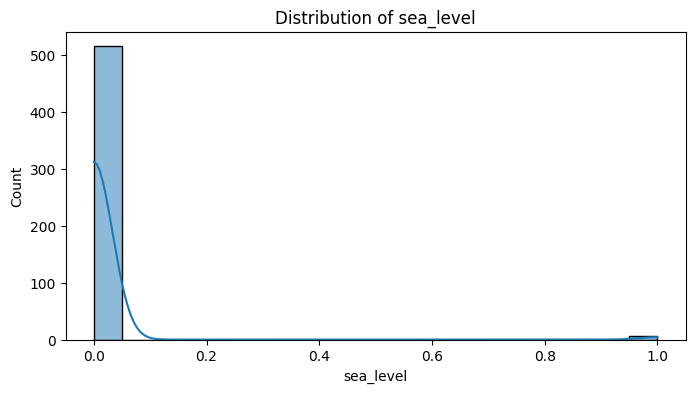

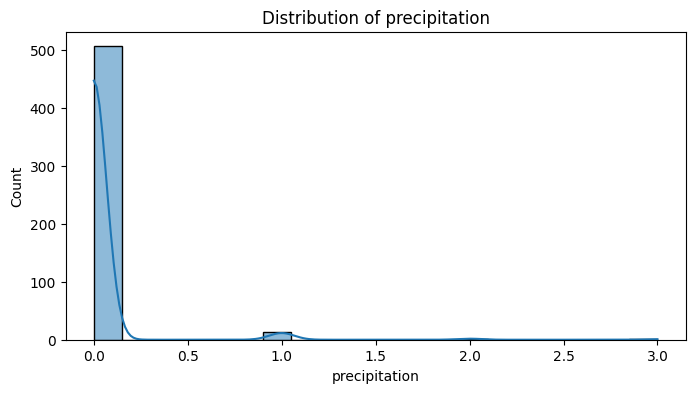

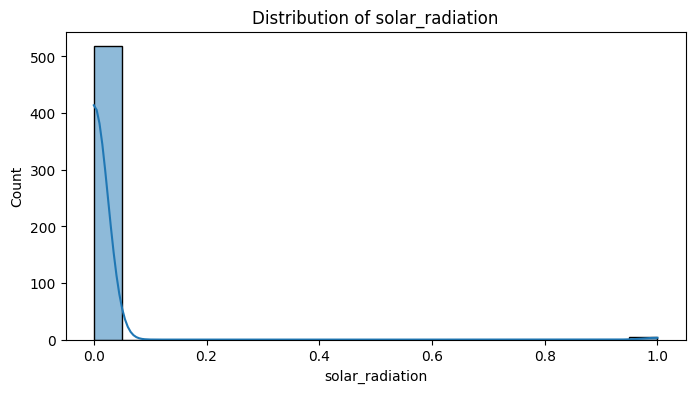

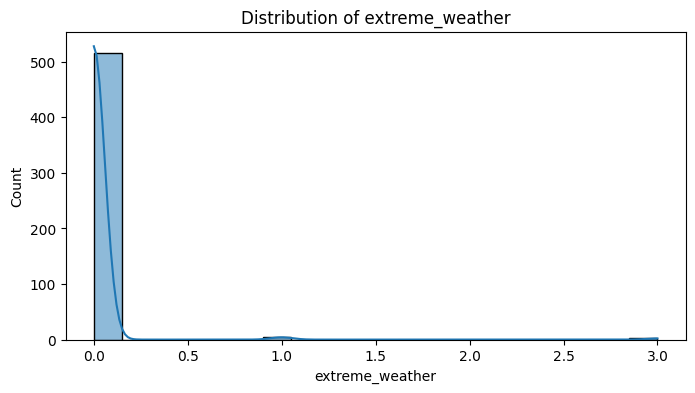

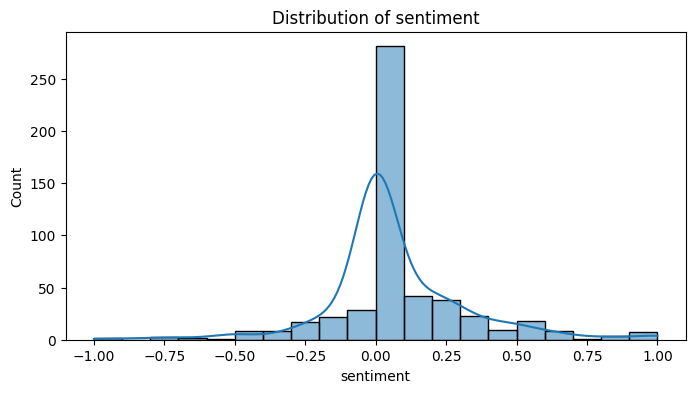

In [346]:
# DISTRIBUTION OF NUMERIC COLUMNS
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

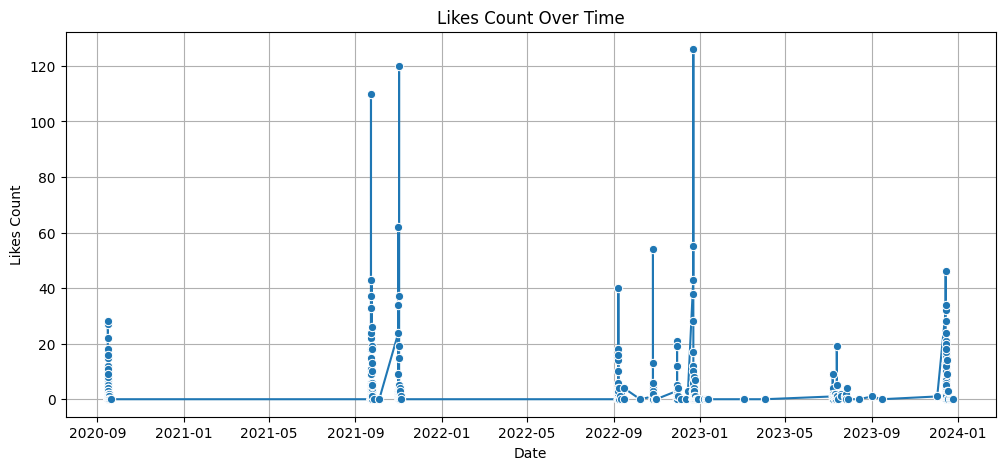

In [347]:
# Likes over time

plt.figure(figsize=(12,5))
sns.lineplot(x='date', y='likesCount', data=df, marker='o')
plt.title("Likes Count Over Time")
plt.xlabel("Date")
plt.ylabel("Likes Count")
plt.grid(True)
plt.show()

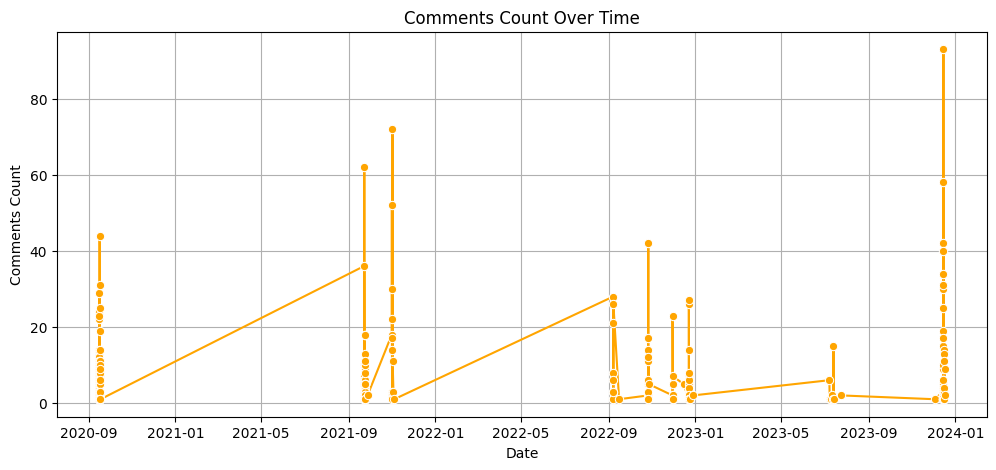

In [348]:
# Comments over time
plt.figure(figsize=(12,5))
sns.lineplot(x='date', y='commentsCount', data=df, marker='o', color='orange')
plt.title("Comments Count Over Time")
plt.xlabel("Date")
plt.ylabel("Comments Count")
plt.grid(True)
plt.show()


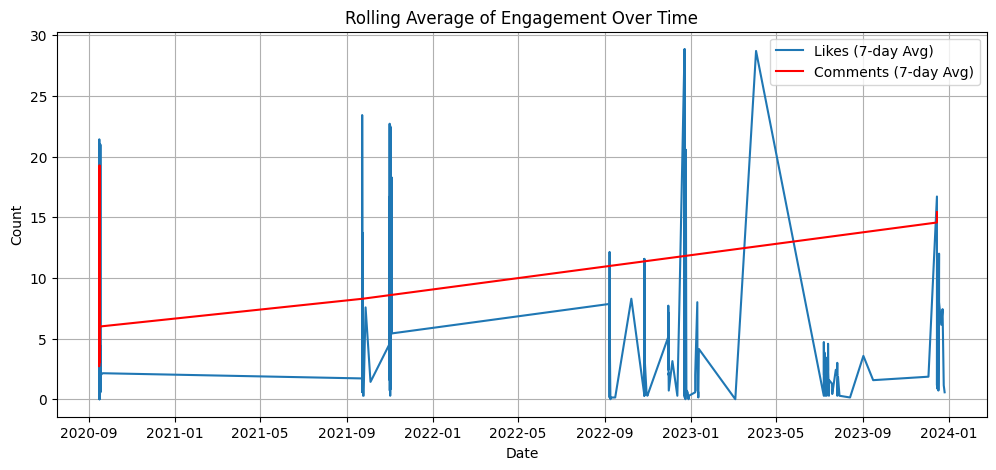

In [349]:
# Rolling Average for Engagement
df['likes_rolling'] = df['likesCount'].rolling(window=7).mean()
df['comments_rolling'] = df['commentsCount'].rolling(window=7).mean()

plt.figure(figsize=(12,5))
sns.lineplot(x='date', y='likes_rolling', data=df, label='Likes (7-day Avg)')
sns.lineplot(x='date', y='comments_rolling', data=df, label='Comments (7-day Avg)', color='red')
plt.title("Rolling Average of Engagement Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [351]:
df.isnull().sum()

,0
date,0
likesCount,0
profileName,0
commentsCount,278
text,18
year,0
temperature,0
co2,0
sea_level,0
precipitation,0


In [352]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [353]:
# Categorical columns -> fill with mode
categorical_cols = df.select_dtypes(exclude='number').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [354]:
# ----- Encode categorical variables -----
df_encoded = pd.get_dummies(df, drop_first=True)

# ----- Standardize continuous features -----
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [355]:
# ----- Split dataset -----
train_df, temp_df = train_test_split(df_encoded, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [356]:
print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Testing set shape:", test_df.shape)
print("\nProcessed Data Sample:")
print(df_encoded.head())

Training set shape: (365, 997)
Validation set shape: (78, 997)
Testing set shape: (79, 997)

Processed Data Sample:
                       date  likesCount  commentsCount      year  temperature  \
0 2022-09-07 17:12:32+00:00   -0.225901       0.000000  0.576066    -0.417584   
1 2022-09-08 14:51:13+00:00   -0.391987       0.000000  0.576066    -0.417584   
2 2022-09-07 17:19:41+00:00   -0.308944      -0.680688  0.576066    -0.417584   
3 2022-09-08 00:51:30+00:00   -0.059816       0.000000  0.576066    -0.417584   
4 2022-09-07 19:06:20+00:00    0.936696       2.067528  0.576066    -0.417584   

        co2  sea_level  precipitation  solar_radiation  extreme_weather  ...  \
0  2.300067  -0.116586      -0.161902        -0.087875        -0.093724  ...   
1 -0.196056  -0.116586      -0.161902        -0.087875        -0.093724  ...   
2  4.796189  -0.116586      -0.161902        -0.087875        -0.093724  ...   
3 -0.196056  -0.116586      -0.161902        -0.087875        -0.093724  ... 

In [357]:
# Feature Engineering: Rolling Averages
df['likesCount_moving_avg_7d'] = df['likesCount'].rolling(window=7).mean()
df['commentsCount_moving_avg_7d'] = df['commentsCount'].rolling(window=7).mean()

# Feature Engineering: Lagged Variables
df['likes_lag_1'] = df['likesCount'].shift(1)
df['comments_lag_1'] = df['commentsCount'].shift(1)

# Display the updated DataFrame with new features
display(df.head())

,date,likesCount,profileName,commentsCount,text,year,temperature,co2,sea_level,precipitation,solar_radiation,extreme_weather,sentiment,likes_rolling,comments_rolling,likesCount_moving_avg_7d,commentsCount_moving_avg_7d,likes_lag_1,comments_lag_1
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,8.696721,Neat comparison I have not heard it before.\n ...,2022,0,1,0,0,0,0,0.000000,4.730343,8.841558,NaN,NaN,NaN,NaN
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,8.696721,An excellent way to visualise the invisible! T...,2022,0,0,0,0,0,0,0.600000,4.730343,8.841558,NaN,NaN,2.0,8.696721
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.000000,Does the CO2/ghg in the troposphere affect the...,2022,0,2,0,0,0,0,0.000000,4.730343,8.841558,NaN,NaN,0.0,8.696721
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,8.696721,excellent post! I defo feel the difference - o...,2022,0,0,0,0,0,0,0.053571,4.730343,8.841558,NaN,NaN,1.0,3.000000
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.000000,"Yes, and carbon dioxide does not harm the Eart...",2022,0,1,0,0,0,0,-0.375000,4.730343,8.841558,NaN,NaN,4.0,8.696721


##  Model Selection and Training

In [358]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [359]:
if 'date' in df.columns:
    df = df.drop(columns=['date'])

In [360]:
# Define target & features
target = 'likesCount'
X = df.drop(columns=[target, 'profileName', 'text'])
y = df[target]

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [361]:
# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
}

In [362]:
#  Train & Evaluate
import numpy as np

results = []
for name, model in models.items():
    # Impute remaining NaNs in training data before fitting
    X_train_imputed = np.nan_to_num(X_train, nan=np.nanmean(X_train))
    X_test_imputed = np.nan_to_num(X_test, nan=np.nanmean(X_test))

    model.fit(X_train_imputed, y_train)
    preds = model.predict(X_test_imputed)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append({"Model": name, "RMSE": rmse, "R²": r2})


In [363]:
# Display results
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)

               Model       RMSE        R²
0  Linear Regression  11.577666  0.253956
2      Random Forest  12.163242  0.176580
3  Gradient Boosting  12.861053  0.079390
4            XGBoost  13.106274  0.043949
1      Decision Tree  14.843629 -0.226317


In [364]:
# Optional: Save Best Model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
import joblib
joblib.dump(best_model, "best_model.pkl")
print(f"✅ Best model saved as best_model.pkl: {best_model_name}")

✅ Best model saved as best_model.pkl: Linear Regression


##  Model Evaluation

In [365]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [366]:
# assuming 'target' is the column we want to predict
# Replace with actual target column name
target_column = "temperature"
X = df.drop(columns=[target_column, 'profileName', 'text'])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [367]:
# Models to test
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100)
}

results = []

In [368]:
#  Train and evaluate each model
import numpy as np # Import numpy for np.nanmean

results = []
for name, model in models.items():
    # Impute missing values in X and y for cross-validation
    X_imputed_cv = np.nan_to_num(X, nan=np.nanmean(X))
    y_imputed_cv = np.nan_to_num(y, nan=np.nanmean(y))

    # Impute missing values in training data before fitting
    X_train_imputed = np.nan_to_num(X_train, nan=np.nanmean(X_train))
    y_train_imputed = np.nan_to_num(y_train, nan=np.nanmean(y_train))

    # Impute missing values in X_test before prediction
    X_test_imputed = np.nan_to_num(X_test, nan=np.nanmean(X_test))

    model.fit(X_train_imputed, y_train_imputed)
    y_pred = model.predict(X_test_imputed)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation (R² score)
    cv_score = cross_val_score(model, X_imputed_cv, y_imputed_cv, cv=5, scoring="r2").mean()

    results.append([name, mae, mse, r2, cv_score])

In [369]:
# Display results
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'R²', 'CV R²'])
display(results_df.sort_values(by='R²', ascending=False))

,Model,MAE,MSE,R²,CV R²
2,Random Forest,0.240095,0.131264,0.215193,0.067178
0,Linear Regression,0.262258,0.157952,0.055627,0.042958
3,XGBoost,0.241845,0.164352,0.017362,-0.173315
1,Decision Tree,0.190476,0.228571,-0.366594,-0.615426


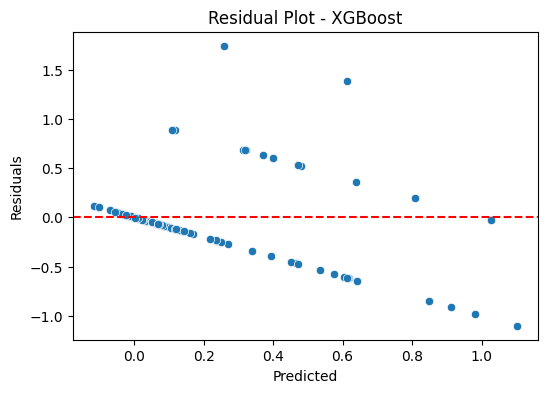

In [370]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title(f"Residual Plot - {name}")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

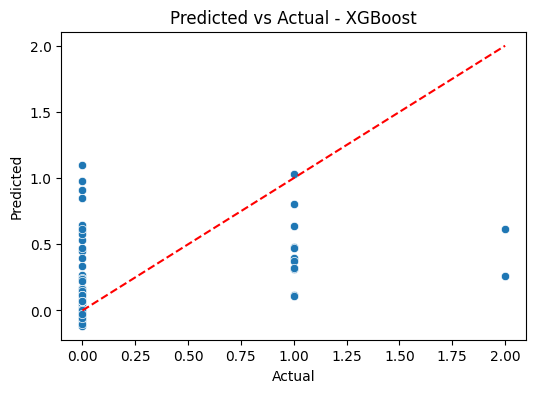

In [371]:
# Predicted vs Actual
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Predicted vs Actual - {name}")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [372]:
X_train.to_csv("climate_nasa_train.csv", index=False)
X_test.to_csv("climate_nasa_test.csv", index=False)


## Future Projections

In [373]:
# Features & target
features = ['temperature', 'co2', 'sea_level', 'precipitation']

In [374]:
# Generate future dates
future_dates = pd.date_range(start=df.index.max(), periods=365, freq='D')

# Assuming X_train_imputed is the numpy array used for training, get the number of features
num_features = X_train_imputed.shape[1]

# Create a numpy array for future features
mean_features = np.nanmean(X_train_imputed, axis=0)
future_features_imputed = np.tile(mean_features, (len(future_dates), 1))


try:

    future_predictions = model.predict(future_features_imputed)
except NameError:
    print("Model not found. Please train a model before making future predictions.")
    future_predictions = [np.nan] * len(future_dates) # Fill with NaN if model is not available



future_predictions_series = pd.Series(future_predictions, index=future_dates)


future_plot_df = pd.DataFrame({target_col: future_predictions_series})


# Display the future projections DataFrame
display(future_plot_df.head())

,profileName
1970-01-01 00:00:00.000000521,0.290689
1970-01-02 00:00:00.000000521,0.290689
1970-01-03 00:00:00.000000521,0.290689
1970-01-04 00:00:00.000000521,0.290689
1970-01-05 00:00:00.000000521,0.290689


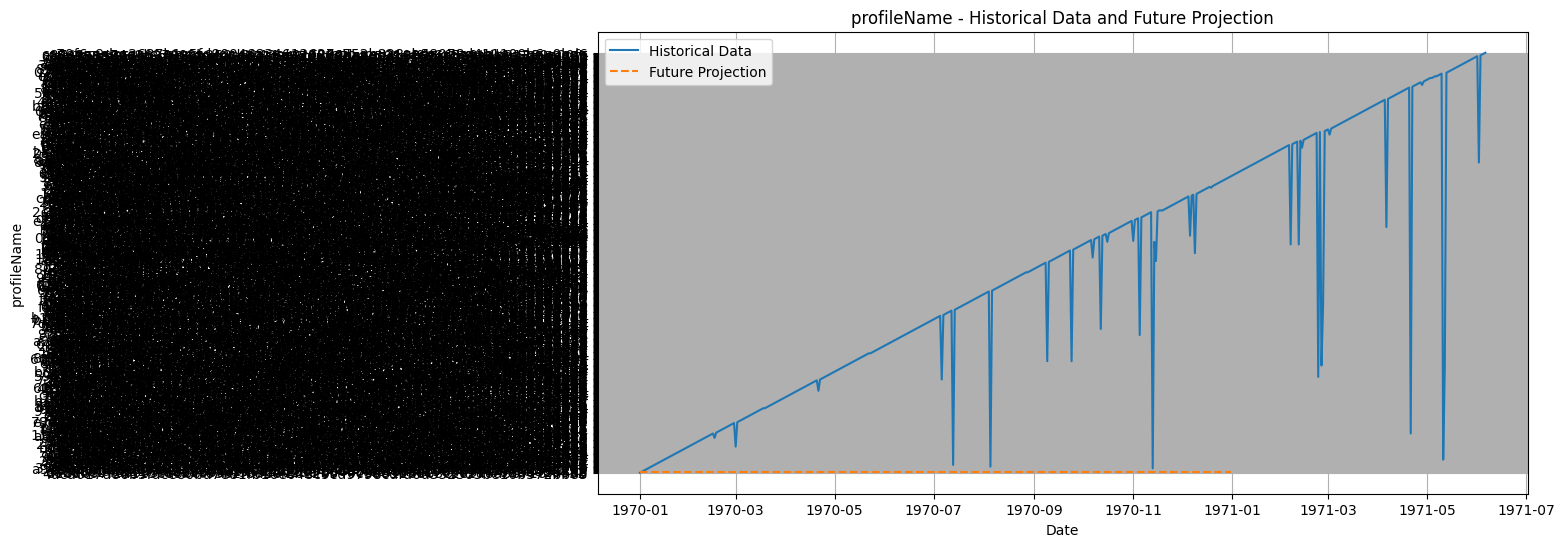

In [375]:
# Visualize historical data and future projections
plt.figure(figsize=(12, 6))

# Use the original df with date index and target_col for historical data (assuming it's prepared correctly in tRdxUtBQpYnS)
plt.plot(df.index, df[target_col], label='Historical Data')

# Plot the future projections from future_plot_df
plt.plot(future_plot_df.index, future_plot_df[target_col], label='Future Projection', linestyle='--')

plt.title(f'{target_col} - Historical Data and Future Projection')
plt.xlabel('Date')
plt.ylabel(target_col)
plt.legend()
plt.grid(True)
plt.show()

## Scenario Analysis

In [376]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [377]:
# Features and target
X = df[['co2', 'temperature', 'sea_level']]
y = df['temperature']

In [378]:
# Split data & train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [379]:
# --- Scenario Simulation ---
base_CO2 = X['co2'].mean()

scenarios = {
    "Low Emission": base_CO2 * 0.9,     # 10% reduction in CO₂
    "Moderate Emission": base_CO2,      # Current level
    "High Emission": base_CO2 * 1.2     # 20% increase in CO₂
}

predictions = {}

for scenario, co2_value in scenarios.items():
    # Keep other features constant at mean
    scenario_data = pd.DataFrame({
        'co2': [co2_value] * 10,
        'temperature': [X['temperature'].mean()] * 10,
        'sea_level': [X['sea_level'].mean()] * 10
    })

    preds = model.predict(scenario_data)
    predictions[scenario] = preds.mean()



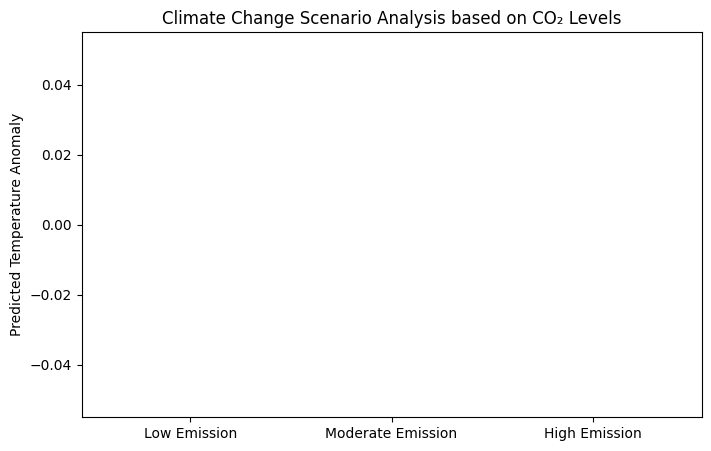

In [380]:
# Plotting Scenario Results
plt.figure(figsize=(8,5))
plt.bar(predictions.keys(), predictions.values(), color=['green', 'orange', 'red'])
plt.ylabel("Predicted Temperature Anomaly")
plt.title("Climate Change Scenario Analysis based on CO₂ Levels")
plt.show()

In [381]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_scenario, X_test_scenario, y_train_scenario, y_test_scenario = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model for scenario analysis
# Using RandomForestRegressor as it performed relatively well in the model evaluation section
from sklearn.ensemble import RandomForestRegressor
scenario_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Impute missing values in training data before fitting
import numpy as np
X_train_scenario_imputed = np.nan_to_num(X_train_scenario, nan=np.nanmean(X_train_scenario))
y_train_scenario_imputed = np.nan_to_num(y_train_scenario, nan=np.nanmean(y_train_scenario))

scenario_model.fit(X_train_scenario_imputed, y_train_scenario_imputed)

print("Scenario analysis model trained successfully.")

Scenario analysis model trained successfully.


In [382]:
# Define hypothetical scenarios

X_scenario_features = df[['co2', 'sea_level']]
y_scenario_target = df['temperature']

# Train a new model for scenario analysis with the updated features
from sklearn.ensemble import RandomForestRegressor
scenario_model_redefined = RandomForestRegressor(n_estimators=100, random_state=42)

# Split and impute the redefined scenario data
X_train_scenario_redefined, X_test_scenario_redefined, y_train_scenario_redefined, y_test_scenario_redefined = train_test_split(X_scenario_features, y_scenario_target, test_size=0.2, random_state=42)

X_train_scenario_redefined_imputed = np.nan_to_num(X_train_scenario_redefined, nan=np.nanmean(X_train_scenario_redefined))
y_train_scenario_redefined_imputed = np.nan_to_num(y_train_scenario_redefined, nan=np.nanmean(y_train_scenario_redefined))

scenario_model_redefined.fit(X_train_scenario_redefined_imputed, y_train_scenario_redefined_imputed)
print("Scenario analysis model (redefined features) trained successfully.")


# Now define scenarios using the redefined features (co2, sea_level)
scenarios = {
    "Baseline": {'co2': np.nanmean(X_scenario_features['co2']), 'sea_level': np.nanmean(X_scenario_features['sea_level'])}, # Use mean values as a baseline
    "Increased CO2": {'co2': np.nanmean(X_scenario_features['co2']) * 1.5, 'sea_level': np.nanmean(X_scenario_features['sea_level'])}, # 50% increase in CO2
    "Increased Sea Level": {'co2': np.nanmean(X_scenario_features['co2']), 'sea_level': np.nanmean(X_scenario_features['sea_level']) * 1.5}, # 50% increase in Sea Level
    "Increased CO2 and Sea Level": {'co2': np.nanmean(X_scenario_features['co2']) * 1.5, 'sea_level': np.nanmean(X_scenario_features['sea_level']) * 1.5} # 50% increase in both
}

# Create a DataFrame from scenarios for prediction
scenario_df = pd.DataFrame.from_dict(scenarios, orient='index')

# Impute missing values in scenario_df (should not be any if using means)
scenario_df_imputed = np.nan_to_num(scenario_df, nan=np.nanmean(scenario_df))


# Predict temperature for each scenario using the redefined model
scenario_predictions = scenario_model_redefined.predict(scenario_df_imputed)

# Add predictions to the scenario DataFrame
scenario_df[target_col] = scenario_predictions

# Display the scenario analysis results
print("\nScenario Analysis Results:")
display(scenario_df)

Scenario analysis model (redefined features) trained successfully.

Scenario Analysis Results:


,co2,sea_level,profileName
Baseline,0.078544,0.013410,0.168422
Increased CO2,0.117816,0.013410,0.168422
Increased Sea Level,0.078544,0.020115,0.168422
Increased CO2 and Sea Level,0.117816,0.020115,0.168422
